In [115]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [116]:
og_df = pd.read_csv('./Unprocessed Datasets/filt_india.csv')
og_df = og_df.drop("Country", axis=1)
og_df.drop(og_df.filter(regex="Unname"), axis=1, inplace=True)
fullDf = og_df.copy()
og_df = og_df.head(10)
og_df

,dt,AverageTemperature
0,1796-01-01,17.044
1,1796-02-01,19.193
2,1796-03-01,22.319
3,1796-04-01,27.233
4,1796-05-01,30.035
5,1796-06-01,29.261
6,1796-07-01,26.800
7,1796-08-01,26.558
8,1796-09-01,25.958
9,1796-10-01,24.031


In [117]:
og_df.iloc[0]["AverageTemperature"]

17.044

In [118]:
# Generate Random NaNs in the dataframe
df = og_df.copy()
ix = [(row, 1) for row in range(df.shape[0]) for col in range(df.shape[1])]
for row, col in random.sample(ix, int(round(0.2*len(ix)))):
    df.iat[row, 1] = np.nan
df

,dt,AverageTemperature
0,1796-01-01,17.044
1,1796-02-01,19.193
2,1796-03-01,NaN
3,1796-04-01,NaN
4,1796-05-01,30.035
5,1796-06-01,29.261
6,1796-07-01,NaN
7,1796-08-01,26.558
8,1796-09-01,NaN
9,1796-10-01,24.031


In [119]:
# Filling method
newdf = df.interpolate()
if newdf["AverageTemperature"].isnull().values.any():
    newdf = newdf.fillna(method='bfill')
newdf

,dt,AverageTemperature
0,1796-01-01,17.0440
1,1796-02-01,19.1930
2,1796-03-01,22.8070
3,1796-04-01,26.4210
4,1796-05-01,30.0350
5,1796-06-01,29.2610
6,1796-07-01,27.9095
7,1796-08-01,26.5580
8,1796-09-01,25.2945
9,1796-10-01,24.0310


In [120]:
newset2 = df.fillna(method='ffill')
if newset2["AverageTemperature"].isnull().values.any():
    newset2 = newset2.fillna(method='bfill')
newset2

,dt,AverageTemperature
0,1796-01-01,17.044
1,1796-02-01,19.193
2,1796-03-01,19.193
3,1796-04-01,19.193
4,1796-05-01,30.035
5,1796-06-01,29.261
6,1796-07-01,29.261
7,1796-08-01,26.558
8,1796-09-01,26.558
9,1796-10-01,24.031


In [121]:
newset3 = df.fillna(method='bfill')
if newset3["AverageTemperature"].isnull().values.any():
    newset3 = newset3.fillna(method='ffill')
newset3

,dt,AverageTemperature
0,1796-01-01,17.044
1,1796-02-01,19.193
2,1796-03-01,30.035
3,1796-04-01,30.035
4,1796-05-01,30.035
5,1796-06-01,29.261
6,1796-07-01,26.558
7,1796-08-01,26.558
8,1796-09-01,24.031
9,1796-10-01,24.031


In [122]:
# Mean
meanFill = df.fillna(value=df["AverageTemperature"].mean())
meanFill

,dt,AverageTemperature
0,1796-01-01,17.044000
1,1796-02-01,19.193000
2,1796-03-01,24.353667
3,1796-04-01,24.353667
4,1796-05-01,30.035000
5,1796-06-01,29.261000
6,1796-07-01,24.353667
7,1796-08-01,26.558000
8,1796-09-01,24.353667
9,1796-10-01,24.031000


In [123]:
# Median
medianFill = df.fillna(value=df["AverageTemperature"].median())
medianFill

,dt,AverageTemperature
0,1796-01-01,17.0440
1,1796-02-01,19.1930
2,1796-03-01,25.2945
3,1796-04-01,25.2945
4,1796-05-01,30.0350
5,1796-06-01,29.2610
6,1796-07-01,25.2945
7,1796-08-01,26.5580
8,1796-09-01,25.2945
9,1796-10-01,24.0310


In [124]:
# Mode
modeFill = df.fillna(value=df["AverageTemperature"].mode()[0])
modeFill

,dt,AverageTemperature
0,1796-01-01,17.044
1,1796-02-01,19.193
2,1796-03-01,17.044
3,1796-04-01,17.044
4,1796-05-01,30.035
5,1796-06-01,29.261
6,1796-07-01,17.044
7,1796-08-01,26.558
8,1796-09-01,17.044
9,1796-10-01,24.031


In [125]:
# Euclidean Distance
def Euclidean_Dist(df1, df2, cols="AverageTemperature"):
    return np.linalg.norm(df1[cols].values - df2[cols].values)
data = {
    "Linear Interpolation": round(Euclidean_Dist(og_df, newdf), 3),
    "Forward Fill": round(Euclidean_Dist(og_df, newset2), 3),
    "Backward Fill": round(Euclidean_Dist(og_df, newset3), 3),
    "Mean": round(Euclidean_Dist(og_df, meanFill), 3),
    "Median": round(Euclidean_Dist(og_df, medianFill), 3),
    "Mode": round(Euclidean_Dist(og_df, modeFill), 3)
}

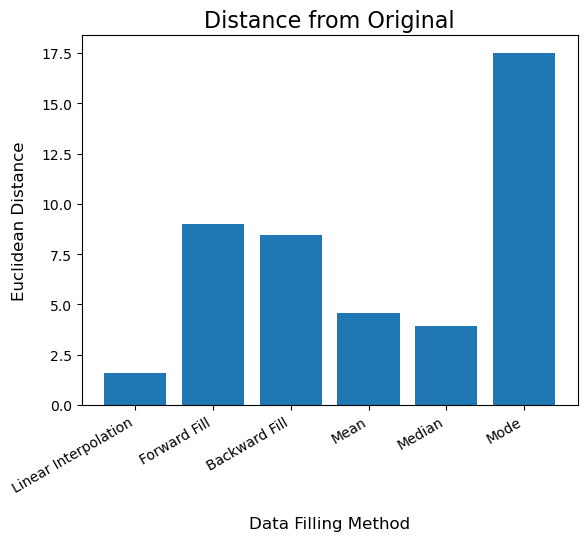

In [126]:
x = list(data.keys())
y = list(data.values())
plt.xlabel('Data Filling Method', labelpad=15, fontdict={'size': 12})
plt.ylabel('Euclidean Distance', labelpad=10, fontdict={'size': 12})
plt.title('Distance from Original', fontdict={'fontsize': 16})
ax = plt.subplot()
plt.bar(x, y)
plt.setp(ax.get_xticklabels(), rotation=30, ha='right')
plt.show()

In [127]:
# Filling whole dataset using linear interpolation
fullDf = fullDf.interpolate()
if fullDf["AverageTemperature"].isnull().values.any():
    fullDf = fullDf.fillna(method='bfill')
fullDf

,dt,AverageTemperature
0,1796-01-01,17.044
1,1796-02-01,19.193
2,1796-03-01,22.319
3,1796-04-01,27.233
4,1796-05-01,30.035
...,...,...
2608,2013-05-01,31.014
2609,2013-06-01,28.766
2610,2013-07-01,27.012
2611,2013-08-01,26.555


In [128]:
fullDf["AverageTemperature"] = fullDf["AverageTemperature"].round(decimals=3)
fullDf.head(10)

,dt,AverageTemperature
0,1796-01-01,17.044
1,1796-02-01,19.193
2,1796-03-01,22.319
3,1796-04-01,27.233
4,1796-05-01,30.035
5,1796-06-01,29.261
6,1796-07-01,26.800
7,1796-08-01,26.558
8,1796-09-01,25.958
9,1796-10-01,24.031


In [129]:
# converting string to datetime
fullDf["dt"] = pd.to_datetime(fullDf["dt"], format="%Y-%m-%d").dt.date
fullDf.to_csv('./Processed Datasets/india.csv', sep=',', index=False)
fullDf.head()

,dt,AverageTemperature
0,1796-01-01,17.044
1,1796-02-01,19.193
2,1796-03-01,22.319
3,1796-04-01,27.233
4,1796-05-01,30.035


In [149]:
df1 = pd.DataFrame()
years = []
for i in range(len(fullDf)):
    years.append(fullDf.iloc[i]["dt"].year)
years = list(set(years))